# Feature Selection

In [127]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt  # Matlab-style plotting
# Make sure plot shows immediately
%matplotlib inline 
import seaborn as sns # Library for plotting
color = sns.color_palette()
sns.set_style('darkgrid')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
def show_stt(df):
    print("Shape: ", df.shape)
    print("Dtypes: ", df.dtypes)
    print("Describe: \n", df.describe())
    print("Unique value: ")
    ls = list(filter(lambda i : df[i].dtype == 'object', list(df.columns)))
    for i in ls:
        print("[{}]: {}".format(i, df[i].unique()))
    return df.sample(5)

# Strategy A

In [25]:
df_a_train = pd.read_csv("./processed/DatasetATrain.csv", index_col=["MemberID"])
df_a_test = pd.read_csv("./processed/DatasetATest.csv", index_col=["MemberID"])

In [5]:
show_stt(df_a_train)

Shape:  (76038, 121)
Dtypes:  AgeAtFirstClaim    float64
Sex                 object
ClaimCount         float64
ProviderID         float64
Vendor             float64
                    ...   
DrugCountAvg       float64
DrugCountStd       float64
DrugCountSum       float64
DrugClaimCount     float64
DaysInHospital     float64
Length: 121, dtype: object
Describe: 
        AgeAtFirstClaim    ClaimCount    ProviderID        Vendor  \
count     71496.000000  76038.000000  76038.000000  76038.000000   
mean         48.606915     11.384952      4.404127      3.705805   
std          24.831272     10.555889      3.341382      2.615952   
min           5.000000      1.000000      0.000000      0.000000   
25%          25.000000      3.000000      2.000000      2.000000   
50%          55.000000      8.000000      3.000000      3.000000   
75%          75.000000     16.000000      6.000000      5.000000   
max          85.000000     43.000000     27.000000     19.000000   

                PCP  

,AgeAtFirstClaim,Sex,ClaimCount,ProviderID,Vendor,PCP,SpecialtyCount_Surgery,SpecialtyCount_Rehabilitation,SpecialtyCount_Diagnostic Imaging,SpecialtyCount_Emergency,...,LabCountStd,LabCountSum,LabClaimCount,DrugCountMin,DrugCountMax,DrugCountAvg,DrugCountStd,DrugCountSum,DrugClaimCount,DaysInHospital
MemberID,,,,,,,,,,,,,,,,,,,,,
46343873,75.0,F,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,4.0,7.0,6.25,1.035098,50.0,8.0,0.0
46503266,65.0,F,15.0,6.0,6.0,1.0,8.0,0.0,0.0,0.0,...,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
89236682,45.0,F,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,...,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
35689950,55.0,M,9.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.816497,8.0,4.0,5.0,5.0,5.00,0.000000,20.0,4.0,0.0
39351891,55.0,F,10.0,4.0,4.0,1.0,0.0,0.0,1.0,0.0,...,0.707107,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


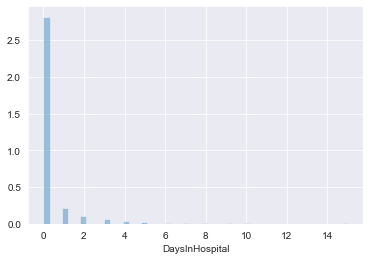

In [16]:
sns.distplot(df_a_train["DaysInHospital"])

In [37]:
missing_rate = df_a_train.isnull().sum() / df_a_train.shape[0]
missing_rate

AgeAtFirstClaim    0.0
ClaimCount         0.0
ProviderID         0.0
Vendor             0.0
PCP                0.0
                  ... 
DrugClaimCount     0.0
DaysInHospital     0.0
Sex_F              0.0
Sex_M              0.0
Sex_NaN            0.0
Length: 123, dtype: float64

In [38]:
need_remove = missing_rate[missing_rate != 0]
need_remove

Series([], dtype: float64)

In [82]:
def one_hot_encode(df, column, params=None, drop=False):
    df[column].fillna("NaN", inplace=True)
    if params == None:
        value_count = df[column].value_counts()

        category = list(value_count.index)
        max_category = category[np.argmax(value_count)]
        if drop:
            category.remove(max_category)
        
        for index in category:
            column_name = "{}_{}".format(column, index)
            df[column_name] = 0
            df.loc[df[column] == index, column_name] = 1

        df.drop(columns=[column], inplace=True)
        return { "category": list(value_count.index), "drop": max_category }
    else:
        category = params["category"]
        is_drop = params["drop"]
        if drop:
            category.remove(drop)

        for index in category:
            column_name = "{}_{}".format(column, index)
            df[column_name] = 0
            df.loc[df[column] == index, column_name] = 1

        df.drop(columns=[column], inplace=True)
        return params

In [28]:
sex_param = one_hot_encode(df_a_train, "Sex")

In [21]:
sex_param

{'category': ['F', 'M', 'NaN'], 'drop': 'F'}

In [22]:
df_a_train

,AgeAtFirstClaim,ClaimCount,ProviderID,Vendor,PCP,SpecialtyCount_Surgery,SpecialtyCount_Rehabilitation,SpecialtyCount_Diagnostic Imaging,SpecialtyCount_Emergency,SpecialtyCount_Internal,...,DrugCountMin,DrugCountMax,DrugCountAvg,DrugCountStd,DrugCountSum,DrugClaimCount,DaysInHospital,Sex_F,Sex_M,Sex_NaN
MemberID,,,,,,,,,,,,,,,,,,,,,
210,35,8.0,4.0,4.0,2.0,0.0,0.0,0.0,2.0,4.0,...,1.0,2.0,1.666667,0.577350,5.0,3.0,0.0,0,0,1
3197,5,5.0,3.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,...,1.0,2.0,1.250000,0.500000,5.0,4.0,0.0,1,0,0
3889,-1,13.0,7.0,7.0,1.0,0.0,0.0,1.0,4.0,4.0,...,2.0,5.0,3.000000,0.816497,30.0,10.0,0.0,1,0,0
4187,55,4.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,2.0,...,3.0,7.0,6.100000,1.449138,61.0,10.0,0.0,1,0,0
9063,65,4.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,3.0,...,1.0,1.0,1.000000,0.000000,2.0,2.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995554,45,35.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,26.0,...,1.0,4.0,2.000000,1.414214,8.0,4.0,0.0,0,1,0
99996214,45,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1,0
99997485,15,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1,0


In [35]:
df_a_train["PayDelayStd"].fillna(-1.0, inplace=True)
df_a_train["LabCountStd"].fillna(-1.0, inplace=True)
df_a_train["DrugCountStd"].fillna(-1.0, inplace=True)
df_a_train.fillna(0.0, inplace=True)

In [44]:
d1 = df_a_train.sample(1000)
cor = d1[d1.columns.difference(['DaysInHospital'])].corr().abs()
cor

,AgeAtFirstClaim,CharlsonIndexAvg,CharlsonIndexMax,CharlsonIndexMin,ClaimCount,DSFSMax,DSFSMin,DrugClaimCount,DrugCountAvg,DrugCountMax,...,SpecialtyCount_Internal,SpecialtyCount_Laboratory,SpecialtyCount_Obstetrics and Gynecology,SpecialtyCount_Other,SpecialtyCount_Pathology,SpecialtyCount_Pediatrics,SpecialtyCount_Rehabilitation,SpecialtyCount_Surgery,SpecialtyCount_nan,Vendor
AgeAtFirstClaim,1.000000,0.298620,0.295688,0.158785,0.271904,0.297485,NaN,0.405907,0.336146,0.366098,...,0.287102,0.289764,0.030408,0.116461,0.032983,0.308144,0.072105,0.137102,0.019993,0.209289
CharlsonIndexAvg,0.298620,1.000000,0.918972,0.691234,0.499269,0.361102,NaN,0.393117,0.405788,0.428646,...,0.442370,0.345341,0.070147,0.191706,0.045314,0.099452,0.052004,0.281382,0.078801,0.392938
CharlsonIndexMax,0.295688,0.918972,1.000000,0.538496,0.527888,0.369155,NaN,0.398279,0.417583,0.443012,...,0.453654,0.357404,0.069342,0.211974,0.058719,0.100461,0.049071,0.281380,0.077320,0.435568
CharlsonIndexMin,0.158785,0.691234,0.538496,1.000000,0.212832,0.159100,NaN,0.186074,0.200454,0.214919,...,0.231852,0.161129,0.055672,0.049825,0.030131,0.048138,0.021427,0.149123,0.008720,0.169715
ClaimCount,0.271904,0.499269,0.527888,0.212832,1.000000,0.687899,NaN,0.563614,0.444941,0.520888,...,0.694673,0.664100,0.065956,0.341771,0.181428,0.025263,0.242599,0.539990,0.100183,0.805736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SpecialtyCount_Pediatrics,0.308144,0.099452,0.100461,0.048138,0.025263,0.042542,NaN,0.127581,0.132940,0.140189,...,0.103979,0.078617,0.007649,0.045949,0.024823,1.000000,0.032470,0.037014,0.014478,0.036497
SpecialtyCount_Rehabilitation,0.072105,0.052004,0.049071,0.021427,0.242599,0.158795,NaN,0.126519,0.076880,0.095509,...,0.042576,0.060506,0.024033,0.014125,0.018680,0.032470,1.000000,0.142593,0.020317,0.202319
SpecialtyCount_Surgery,0.137102,0.281382,0.281380,0.149123,0.539990,0.339764,NaN,0.294666,0.227482,0.272478,...,0.280611,0.226101,0.028744,0.064104,0.139041,0.037014,0.142593,1.000000,0.047647,0.510448
SpecialtyCount_nan,0.019993,0.078801,0.077320,0.008720,0.100183,0.049596,NaN,0.007294,0.049510,0.056566,...,0.052935,0.038593,0.007942,0.000522,0.001998,0.014478,0.020317,0.047647,1.000000,0.140247


In [45]:
high_corr = np.where(cor > 0.8)
high_corr = [(cor.columns[x],cor.columns[y]) for x,y in zip(*high_corr) if x!=y and x<y]
high_corr

[('CharlsonIndexAvg', 'CharlsonIndexMax'),
 ('ClaimCount', 'LengthOfStayCountNan'),
 ('ClaimCount', 'PayDelaySum'),
 ('ClaimCount', 'PlaceSvcCount_Office'),
 ('ClaimCount', 'ProcedureGroupCount_EM'),
 ('ClaimCount', 'ProviderID'),
 ('ClaimCount', 'Vendor'),
 ('DrugClaimCount', 'DrugCountMax'),
 ('DrugClaimCount', 'DrugCountSum'),
 ('DrugCountAvg', 'DrugCountMax'),
 ('DrugCountAvg', 'DrugCountMin'),
 ('DrugCountAvg', 'DrugCountSum'),
 ('DrugCountMax', 'DrugCountStd'),
 ('DrugCountMax', 'DrugCountSum'),
 ('LabClaimCount', 'LabCountSum'),
 ('LabClaimCount', 'PlaceSvcCount_Independent Lab'),
 ('LabClaimCount', 'ProcedureGroupCount_PL'),
 ('LabClaimCount', 'SpecialtyCount_Laboratory'),
 ('LabCountAvg', 'LabCountMax'),
 ('LabCountAvg', 'LabCountMin'),
 ('LabCountMax', 'LabCountSum'),
 ('LengthOfStayAvg', 'LengthOfStayMax'),
 ('LengthOfStayAvg', 'LengthOfStayMin'),
 ('LengthOfStayCountNan', 'PayDelaySum'),
 ('LengthOfStayCountNan', 'PlaceSvcCount_Office'),
 ('LengthOfStayCountNan', 'Procedure

In [46]:
for row, col in high_corr:
    print("Row: %s, Col: %s, corr=%s" % (row, col, cor[row][col]))

Row: CharlsonIndexAvg, Col: CharlsonIndexMax, corr=0.9189719125109225
Row: ClaimCount, Col: LengthOfStayCountNan, corr=0.9971904735304288
Row: ClaimCount, Col: PayDelaySum, corr=0.9074177246308364
Row: ClaimCount, Col: PlaceSvcCount_Office, corr=0.8600508625456887
Row: ClaimCount, Col: ProcedureGroupCount_EM, corr=0.8673797149707176
Row: ClaimCount, Col: ProviderID, corr=0.8400148945824265
Row: ClaimCount, Col: Vendor, corr=0.8057359259114205
Row: DrugClaimCount, Col: DrugCountMax, corr=0.80757370506159
Row: DrugClaimCount, Col: DrugCountSum, corr=0.8433650383677248
Row: DrugCountAvg, Col: DrugCountMax, corr=0.9397674409403389
Row: DrugCountAvg, Col: DrugCountMin, corr=0.840383777807836
Row: DrugCountAvg, Col: DrugCountSum, corr=0.85300402783089
Row: DrugCountMax, Col: DrugCountStd, corr=0.8992557221334111
Row: DrugCountMax, Col: DrugCountSum, corr=0.8505894822121106
Row: LabClaimCount, Col: LabCountSum, corr=0.8269220685643857
Row: LabClaimCount, Col: PlaceSvcCount_Independent Lab, co

In [47]:
remove_col = ["CharlsonIndexAvg", "LengthOfStayCountNan", "PayDelaySum", "ProviderID", "Vendor", "DrugCountMax", "DrugCountSum", "DrugCountMin", "DrugCountStd", "LabCountSum", "LabCountMax", "LabCountMin", "LengthOfStayMax", "LengthOfStayMin"]

In [48]:
df_a_train.drop(columns=remove_col, inplace=True)

,AgeAtFirstClaim,ClaimCount,PCP,SpecialtyCount_Surgery,SpecialtyCount_Rehabilitation,SpecialtyCount_Diagnostic Imaging,SpecialtyCount_Emergency,SpecialtyCount_Internal,SpecialtyCount_General Practice,SpecialtyCount_Laboratory,...,ProcedureGroupCount_SO,LabCountAvg,LabCountStd,LabClaimCount,DrugCountAvg,DrugClaimCount,DaysInHospital,Sex_F,Sex_M,Sex_NaN
MemberID,,,,,,,,,,,,,,,,,,,,,
210,35,8.0,2.0,0.0,0.0,0.0,2.0,4.0,0.0,2.0,...,0.0,2.000000,0.000000,1.0,1.666667,3.0,0.0,0,0,1
3197,5,5.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.000000,-1.000000,0.0,1.250000,4.0,0.0,1,0,0
3889,-1,13.0,1.0,0.0,0.0,1.0,4.0,4.0,0.0,4.0,...,0.0,10.000000,0.000000,1.0,3.000000,10.0,0.0,1,0,0
4187,55,4.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.000000,-1.000000,0.0,6.100000,10.0,0.0,1,0,0
9063,65,4.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.000000,-1.000000,0.0,1.000000,2.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995554,45,35.0,1.0,0.0,0.0,0.0,0.0,26.0,2.0,7.0,...,0.0,3.666667,3.785939,3.0,2.000000,4.0,0.0,0,1,0
99996214,45,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,-1.000000,0.0,0.000000,0.0,0.0,0,1,0
99997485,15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,-1.000000,0.0,0.000000,0.0,0.0,0,1,0


In [67]:
X_train = df_a_train[df_a_train.columns.difference(["DaysInHospital"])]
y_train = df_a_train[["DaysInHospital"]]

In [68]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

In [70]:
X_train

,AgeAtFirstClaim,CharlsonIndexMax,CharlsonIndexMin,ClaimCount,DSFSMax,DSFSMin,DrugClaimCount,DrugCountAvg,LabClaimCount,LabCountAvg,...,SpecialtyCount_General Practice,SpecialtyCount_Internal,SpecialtyCount_Laboratory,SpecialtyCount_Obstetrics and Gynecology,SpecialtyCount_Other,SpecialtyCount_Pathology,SpecialtyCount_Pediatrics,SpecialtyCount_Rehabilitation,SpecialtyCount_Surgery,SpecialtyCount_nan
MemberID,,,,,,,,,,,,,,,,,,,,,
210,35,0.0,0.0,8.0,10.0,1.0,3.0,1.666667,1.0,2.000000,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3197,5,0.0,0.0,5.0,12.0,1.0,4.0,1.250000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3889,-1,2.0,0.0,13.0,2.0,1.0,10.0,3.000000,1.0,10.000000,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4187,55,0.0,0.0,4.0,9.0,1.0,10.0,6.100000,0.0,0.000000,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9063,65,0.0,0.0,4.0,2.0,1.0,2.0,1.000000,0.0,0.000000,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995554,45,0.0,0.0,35.0,10.0,1.0,4.0,2.000000,3.0,3.666667,...,2.0,26.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996214,45,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997485,15,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [74]:
X_train

,AgeAtFirstClaim,CharlsonIndexMax,CharlsonIndexMin,ClaimCount,DSFSMax,DSFSMin,DrugClaimCount,DrugCountAvg,LabClaimCount,LabCountAvg,...,SpecialtyCount_General Practice,SpecialtyCount_Internal,SpecialtyCount_Laboratory,SpecialtyCount_Obstetrics and Gynecology,SpecialtyCount_Other,SpecialtyCount_Pathology,SpecialtyCount_Pediatrics,SpecialtyCount_Rehabilitation,SpecialtyCount_Surgery,SpecialtyCount_nan
MemberID,,,,,,,,,,,,,,,,,,,,,
210,0.418605,0.000000,0.0,0.166667,0.833333,0.111111,0.250000,0.238095,0.083333,0.200000,...,0.000000,0.102564,0.046512,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3197,0.069767,0.000000,0.0,0.095238,1.000000,0.111111,0.333333,0.178571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.078947,0.0,0.000000,0.0
3889,0.000000,0.333333,0.0,0.285714,0.166667,0.111111,0.833333,0.428571,0.083333,1.000000,...,0.000000,0.102564,0.093023,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4187,0.651163,0.000000,0.0,0.071429,0.750000,0.111111,0.833333,0.871429,0.000000,0.000000,...,0.000000,0.051282,0.000000,0.0,0.028571,0.0,0.000000,0.0,0.000000,0.0
9063,0.767442,0.000000,0.0,0.071429,0.166667,0.111111,0.166667,0.142857,0.000000,0.000000,...,0.000000,0.076923,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995554,0.534884,0.000000,0.0,0.809524,0.833333,0.111111,0.333333,0.285714,0.250000,0.366667,...,0.051282,0.666667,0.162791,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
99996214,0.534884,0.000000,0.0,0.000000,0.083333,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.025641,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
99997485,0.186047,0.000000,0.0,0.000000,0.083333,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.025641,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [50]:
df_a_train.to_csv("./processed/strategy-a/train/train.csv")

In [75]:
X_train.to_csv("./processed/strategy-a/train/X_train.csv")

In [76]:
y_train.to_csv("./processed/strategy-a/train/y_train.csv")

## Test set

In [90]:
df_a_test

,AgeAtFirstClaim,ClaimCount,PCP,SpecialtyCount_Surgery,SpecialtyCount_Rehabilitation,SpecialtyCount_General Practice,SpecialtyCount_Emergency,SpecialtyCount_Laboratory,SpecialtyCount_Other,SpecialtyCount_Obstetrics and Gynecology,...,ProcedureGroupCount_nan,LabCountAvg,LabCountStd,LabClaimCount,DrugCountAvg,DrugClaimCount,DaysInHospital,Sex_F,Sex_M,Sex_NaN
MemberID,,,,,,,,,,,,,,,,,,,,,
4,5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.000000,0.0,0.000000,0.0,0.0,0,1,0
210,35,6.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0.0,1.0,0.000000,1.0,0.000000,0.0,0.0,0,0,1
3197,5,5.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,2.0,0.000000,1.0,1.500000,2.0,0.0,1,0,0
3457,5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.000000,0.0,0.000000,0.0,0.0,0,1,0
3713,45,10.0,2.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,...,0.0,4.5,4.949747,2.0,4.250000,4.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985996,-1,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.000000,0.0,3.000000,6.0,0.0,1,0,0
99987030,25,4.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,-1.000000,0.0,2.000000,1.0,0.0,0,1,0
99995391,65,11.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,1.0,2.333333,6.0,0.0,0,0,1


In [86]:
missing_rate = df_a_test.isnull().sum() / df_a_test.shape[0]
missing_rate

AgeAtFirstClaim    0.0
ClaimCount         0.0
ProviderID         0.0
Vendor             0.0
PCP                0.0
                  ... 
DrugClaimCount     0.0
DaysInHospital     0.0
Sex_F              0.0
Sex_M              0.0
Sex_NaN            0.0
Length: 123, dtype: float64

In [87]:
need_remove = missing_rate[missing_rate != 0]
need_remove

Series([], dtype: float64)

In [83]:
one_hot_encode(df_a_test, "Sex", sex_param)

{'category': ['F', 'M', 'NaN'], 'drop': 'F'}

In [85]:
df_a_test["PayDelayStd"].fillna(-1.0, inplace=True)
df_a_test["LabCountStd"].fillna(-1.0, inplace=True)
df_a_test["DrugCountStd"].fillna(-1.0, inplace=True)
df_a_test.fillna(0.0, inplace=True)

In [89]:
df_a_test.drop(columns=remove_col, inplace=True)

In [91]:
X_test = df_a_test[df_a_test.columns.difference(["DaysInHospital"])]
y_test = df_a_test[["DaysInHospital"]]

In [92]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [93]:
X_test

,AgeAtFirstClaim,CharlsonIndexMax,CharlsonIndexMin,ClaimCount,DSFSMax,DSFSMin,DrugClaimCount,DrugCountAvg,LabClaimCount,LabCountAvg,...,SpecialtyCount_General Practice,SpecialtyCount_Internal,SpecialtyCount_Laboratory,SpecialtyCount_Obstetrics and Gynecology,SpecialtyCount_Other,SpecialtyCount_Pathology,SpecialtyCount_Pediatrics,SpecialtyCount_Rehabilitation,SpecialtyCount_Surgery,SpecialtyCount_nan
MemberID,,,,,,,,,,,,,,,,,,,,,
4,0.069767,0.000000,0.000000,0.000000,0.083333,0.111111,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.026316,0.0,0.000000,0.0
210,0.418605,0.000000,0.000000,0.119048,0.833333,0.111111,0.000000,0.000000,0.083333,0.10,...,0.000000,0.025641,0.023256,0.000000,0.114286,0.0,0.000000,0.0,0.000000,0.0
3197,0.069767,0.000000,0.000000,0.095238,0.166667,0.111111,0.166667,0.214286,0.083333,0.20,...,0.000000,0.025641,0.046512,0.000000,0.000000,0.0,0.026316,0.0,0.000000,0.0
3457,0.069767,0.000000,0.000000,0.000000,0.083333,0.111111,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.026316,0.0,0.000000,0.0
3713,0.534884,0.000000,0.000000,0.214286,0.750000,0.111111,0.333333,0.607143,0.166667,0.45,...,0.179487,0.000000,0.046512,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985996,0.000000,0.333333,0.333333,0.095238,0.500000,0.111111,0.500000,0.428571,0.000000,0.00,...,0.000000,0.102564,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.030303,0.0
99987030,0.302326,0.000000,0.000000,0.071429,0.666667,0.111111,0.083333,0.285714,0.000000,0.00,...,0.025641,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
99995391,0.767442,0.000000,0.000000,0.238095,0.500000,0.111111,0.500000,0.333333,0.083333,0.10,...,0.000000,0.153846,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.151515,0.0


In [94]:
df_a_test.to_csv("./processed/strategy-a/test/test.csv")
X_test.to_csv("./processed/strategy-a/test/X_test.csv")
y_test.to_csv("./processed/strategy-a/test/y_test.csv")

# Strategy B

In [101]:
df_b = pd.read_csv("./processed/DatasetB.csv", index_col=["MemberID"])

In [102]:
df_b

,AgeAtFirstClaim,Sex,ClaimCount,ClaimCountLatestYear,ProviderID,ProviderCountLatestYear,Vendor,VendorCountLatestYear,PCP,PCPCountLatestYear,...,LabClaimCountLatestYear,DrugCountMin,DrugCountMax,DrugCountAvg,DrugCountStd,DrugCountSum,DrugClaimCount,DrugCountSumLatestYear,DrugClaimCountLatestYear,DaysInHospital
MemberID,,,,,,,,,,,,,,,,,,,,,
4,5,M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
210,35,NaN,14.0,6.0,5.0,3.0,5.0,3.0,2.0,1.0,...,1.0,1.0,2.0,1.666667,0.577350,5.0,3.0,NaN,NaN,0.0
3197,5,F,10.0,5.0,6.0,4.0,5.0,3.0,1.0,1.0,...,1.0,1.0,2.0,1.333333,0.516398,8.0,6.0,3.0,2.0,0.0
3457,5,M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3713,45,F,10.0,10.0,5.0,5.0,5.0,5.0,2.0,2.0,...,2.0,1.0,6.0,4.250000,2.362908,17.0,4.0,17.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985996,-1,F,5.0,5.0,2.0,2.0,2.0,2.0,1.0,1.0,...,NaN,3.0,3.0,3.000000,0.000000,18.0,6.0,18.0,6.0,0.0
99987030,25,M,4.0,4.0,3.0,3.0,2.0,2.0,1.0,1.0,...,NaN,2.0,2.0,2.000000,NaN,2.0,1.0,2.0,1.0,0.0
99995391,65,NaN,11.0,11.0,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,3.0,2.333333,0.816497,14.0,6.0,14.0,6.0,0.0


In [120]:
missing_rate = df_b.isnull().sum() / df_b.shape[0]
missing_rate

AgeAtFirstClaim             0.0
ClaimCount                  0.0
ClaimCountLatestYear        0.0
ProviderID                  0.0
ProviderCountLatestYear     0.0
                           ... 
DrugClaimCountLatestYear    0.0
DaysInHospital              0.0
Sex_F                       0.0
Sex_M                       0.0
Sex_NaN                     0.0
Length: 141, dtype: float64

In [121]:
need_remove = missing_rate[missing_rate != 0]
need_remove

Series([], dtype: float64)

In [105]:
one_hot_encode(df_b, "Sex")

{'category': ['F', 'M', 'NaN'], 'drop': 'F'}

In [118]:
def fillna(df, params, otherwise=None):
    for col, value in params:
        df[col].fillna(value, inplace=True)
    if otherwise is not None:
        df.fillna(otherwise, inplace=True)

In [109]:
params = [
    ("PayDelayStd", -1.0),
    ("PayDelayStdLatestYear", -1.0),
    ("LabCountStd", -1.0),
    ("DrugCountStd", -1.0)
]

In [119]:
fillna(df_b, params, otherwise=0.0)

In [122]:
d2 = df_b.sample(1000)
cor = d2[d2.columns.difference(['DaysInHospital'])].corr().abs()
cor

,AgeAtFirstClaim,CharlsonIndexAvg,CharlsonIndexMax,CharlsonIndexMaxLatestYear,CharlsonIndexMin,ClaimCount,ClaimCountLatestYear,DSFSMax,DSFSMaxLatestYear,DSFSMin,...,SpecialtyCount_Laboratory,SpecialtyCount_Obstetrics and Gynecology,SpecialtyCount_Other,SpecialtyCount_Pathology,SpecialtyCount_Pediatrics,SpecialtyCount_Rehabilitation,SpecialtyCount_Surgery,SpecialtyCount_nan,Vendor,VendorCountLatestYear
AgeAtFirstClaim,1.000000,0.348823,0.329802,0.335928,0.224810,0.318248,0.290272,0.266208,0.286093,NaN,...,0.306372,0.062565,0.121277,0.045635,0.366181,0.117237,0.163300,0.056014,0.250433,0.262005
CharlsonIndexAvg,0.348823,1.000000,0.891581,0.876052,0.621878,0.533700,0.490563,0.384919,0.394388,NaN,...,0.375930,0.043780,0.266169,0.149498,0.111124,0.061858,0.270130,0.057311,0.454213,0.424903
CharlsonIndexMax,0.329802,0.891581,1.000000,0.960743,0.477446,0.566995,0.524900,0.403434,0.415329,NaN,...,0.403369,0.026812,0.282245,0.213027,0.088137,0.069700,0.274170,0.055231,0.471303,0.442393
CharlsonIndexMaxLatestYear,0.335928,0.876052,0.960743,1.000000,0.487966,0.561849,0.534374,0.402529,0.432663,NaN,...,0.395085,0.035314,0.272626,0.200130,0.090063,0.083250,0.278978,0.059041,0.463828,0.447552
CharlsonIndexMin,0.224810,0.621878,0.477446,0.487966,1.000000,0.261878,0.229835,0.158998,0.178631,NaN,...,0.198520,0.052669,0.146969,0.081319,0.074568,0.012578,0.119732,0.030522,0.218995,0.200666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SpecialtyCount_Rehabilitation,0.117237,0.061858,0.069700,0.083250,0.012578,0.259912,0.234905,0.198512,0.213552,NaN,...,0.067115,0.014866,0.150583,0.003125,0.059074,1.000000,0.094503,0.027010,0.219054,0.190891
SpecialtyCount_Surgery,0.163300,0.270130,0.274170,0.278978,0.119732,0.536520,0.507680,0.343482,0.342117,NaN,...,0.229002,0.010927,0.151398,0.193122,0.079743,0.094503,1.000000,0.034075,0.552431,0.506264
SpecialtyCount_nan,0.056014,0.057311,0.055231,0.059041,0.030522,0.128219,0.129989,0.064013,0.059490,NaN,...,0.074416,0.012871,0.181395,0.197863,0.064192,0.027010,0.034075,1.000000,0.139502,0.093271
Vendor,0.250433,0.454213,0.471303,0.463828,0.218995,0.789599,0.723585,0.548571,0.536744,NaN,...,0.388587,0.185107,0.360044,0.424262,0.080681,0.219054,0.552431,0.139502,1.000000,0.870539


In [123]:
for row, col in high_corr:
    print("Row: %s, Col: %s, corr=%s" % (row, col, cor[row][col]))

Row: CharlsonIndexAvg, Col: CharlsonIndexMax, corr=0.8915812363734692
Row: ClaimCount, Col: LengthOfStayCountNan, corr=0.9985225326266366
Row: ClaimCount, Col: PayDelaySum, corr=0.9305701770260388
Row: ClaimCount, Col: PlaceSvcCount_Office, corr=0.8912207328012108
Row: ClaimCount, Col: ProcedureGroupCount_EM, corr=0.8884156667064733
Row: ClaimCount, Col: ProviderID, corr=0.845086798186959
Row: ClaimCount, Col: Vendor, corr=0.7895985201166396
Row: DrugClaimCount, Col: DrugCountMax, corr=0.7984541896102717
Row: DrugClaimCount, Col: DrugCountSum, corr=0.8590795918243437
Row: DrugCountAvg, Col: DrugCountMax, corr=0.9103076770766105
Row: DrugCountAvg, Col: DrugCountMin, corr=0.7728067670654778
Row: DrugCountAvg, Col: DrugCountSum, corr=0.8222124192469812
Row: DrugCountMax, Col: DrugCountStd, corr=0.8948045141035372
Row: DrugCountMax, Col: DrugCountSum, corr=0.8015418750998557
Row: LabClaimCount, Col: LabCountSum, corr=0.8623698373822013
Row: LabClaimCount, Col: PlaceSvcCount_Independent Lab

In [124]:
remove_col_b = ["CharlsonIndexAvg", "LengthOfStayCountNan", "PayDelaySum", "ProviderID", "Vendor", "DrugCountMax", "DrugCountSum", "DrugCountMin", "DrugCountStd", "LabCountSum", "LabCountMax", "LabCountMin", "LengthOfStayMax", "LengthOfStayMin"]

In [125]:
df_b.drop(columns=remove_col_b, inplace=True)

In [126]:
df_b

,AgeAtFirstClaim,ClaimCount,ClaimCountLatestYear,ProviderCountLatestYear,VendorCountLatestYear,PCP,PCPCountLatestYear,SpecialtyCount_Surgery,SpecialtyCount_Rehabilitation,SpecialtyCount_Diagnostic Imaging,...,LabCountSumLatestYear,LabClaimCountLatestYear,DrugCountAvg,DrugClaimCount,DrugCountSumLatestYear,DrugClaimCountLatestYear,DaysInHospital,Sex_F,Sex_M,Sex_NaN
MemberID,,,,,,,,,,,,,,,,,,,,,
4,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,1,0
210,35,14.0,6.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.666667,3.0,0.0,0.0,0.0,0,0,1
3197,5,10.0,5.0,4.0,3.0,1.0,1.0,0.0,0.0,1.0,...,2.0,1.0,1.333333,6.0,3.0,2.0,0.0,1,0,0
3457,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,1,0
3713,45,10.0,10.0,5.0,5.0,2.0,2.0,0.0,0.0,1.0,...,9.0,2.0,4.250000,4.0,17.0,4.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985996,-1,5.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,3.000000,6.0,18.0,6.0,0.0,1,0,0
99987030,25,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.000000,1.0,2.0,1.0,0.0,0,1,0
99995391,65,11.0,11.0,2.0,2.0,1.0,1.0,5.0,0.0,0.0,...,1.0,1.0,2.333333,6.0,14.0,6.0,0.0,0,0,1


In [128]:
X = df_b[df_b.columns.difference(["DaysInHospital"])]

In [130]:
y = df_b[["DaysInHospital"]]

In [131]:
y

,DaysInHospital
MemberID,
4,0.0
210,0.0
3197,0.0
3457,0.0
3713,0.0
...,...
99985996,0.0
99987030,0.0
99995391,0.0


In [134]:
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [138]:
y_b_train

,DaysInHospital
MemberID,
7641328,0.0
83061669,0.0
84824313,2.0
61515689,0.0
92459860,3.0
...,...
68849480,0.0
28574896,0.0
29790245,0.0


In [139]:
df_b.to_csv("./processed/strategy-b/dataset.csv")
X_b_train.to_csv("./processed/strategy-b/train/X_train.csv")
y_b_train.to_csv("./processed/strategy-b/train/y_train.csv")
X_b_test.to_csv("./processed/strategy-b/test/X_test.csv")
y_b_test.to_csv("./processed/strategy-b/test/y_test.csv")